In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import yfinance as yf
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [17]:
#Obtendo cotacoes
tickers = ["SOJA3.SA", "ABCB4.SA", "SIMH3.SA", "RECV3.SA", "BRAP3.SA"]
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [44]:
yf.pdr_override()
start_date = "2023-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
data = web.get_data_yahoo(tickers, start=start_date, end=end_date)
data.head()

[*********************100%%**********************]  5 of 5 completed


Price       Adj Close                                                 Close  \
Ticker       ABCB4.SA   BRAP3.SA   RECV3.SA  SIMH3.SA   SOJA3.SA   ABCB4.SA   
Date                                                                          
2023-01-02  16.909447  23.200214  31.136719  6.312688   9.563064  18.237885   
2023-01-03  16.236345  22.844246  29.510456  6.023481   9.084910  17.511902   
2023-01-04  16.290920  23.244713  29.596048  6.232907   9.338051  17.570765   
2023-01-05  17.218710  23.645174  29.558006  6.482223   9.413054  18.571444   
2023-01-06  17.264191  24.152428  30.081072  6.761457  10.031840  18.620497   

Price                                               ...       Open             \
Ticker       BRAP3.SA   RECV3.SA SIMH3.SA SOJA3.SA  ...   ABCB4.SA   BRAP3.SA   
Date                                                ...                         
2023-01-02  26.070000  32.740002     6.33    10.20  ...  18.963867  25.580000   
2023-01-03  25.670000  31.030001     6.04     9.69  ...  18.198643  26.070000   
2023-01-04  26.120001  31.120001     6.25     9.96  ...  17.560953  25.680000   
2023-01-05  26.570000  31.080000     6.50    10.04  ...  17.678680  26.129999   
2023-01-06  27.139999  31.629999     6.78    10.70  ...  18.581255  26.809999   

Price                                     Volume                             \
Ticker       RECV3.SA SIMH3.SA SOJA3.SA ABCB4.SA BRAP3.SA RECV3.SA SIMH3.SA   
Date                                                                          
2023-01-02  32.650002     6.65    10.41   519540    80400  1876100  2999600   
2023-01-03  33.150002     6.33    10.14   940004    51300  2282800  4030200   
2023-01-04  30.930000     6.06     9.98   560516    41200  2418100  4039600   
2023-01-05  31.320000     6.30    10.00  1117975    89300  4674500  3035900   
2023-01-06  31.120001     6.60    10.04   668767   174800  1500900  2764000   

Price                
Ticker     SOJA3.SA  
Date                 
2023-01-02   125800  
2023-01-03   309600  
2023-01-04   235600  
2023-01-05    66100  
2023-01-06   161000  

[5 rows x 30 columns]

In [45]:
data_adjClose = data[['Adj Close']]
data_adjClose = pd.DataFrame(data_adjClose)
data_adjClose = data_adjClose['Adj Close']
data_adjClose.head()

Ticker,ABCB4.SA,BRAP3.SA,RECV3.SA,SIMH3.SA,SOJA3.SA
Date,,,,,
2023-01-02,16.909447,23.200214,31.136719,6.312688,9.563064
2023-01-03,16.236345,22.844246,29.510456,6.023481,9.084910
2023-01-04,16.290920,23.244713,29.596048,6.232907,9.338051
2023-01-05,17.218710,23.645174,29.558006,6.482223,9.413054
2023-01-06,17.264191,24.152428,30.081072,6.761457,10.031840


In [46]:
sns.set_palette("viridis")
sns.set_style("darkgrid")

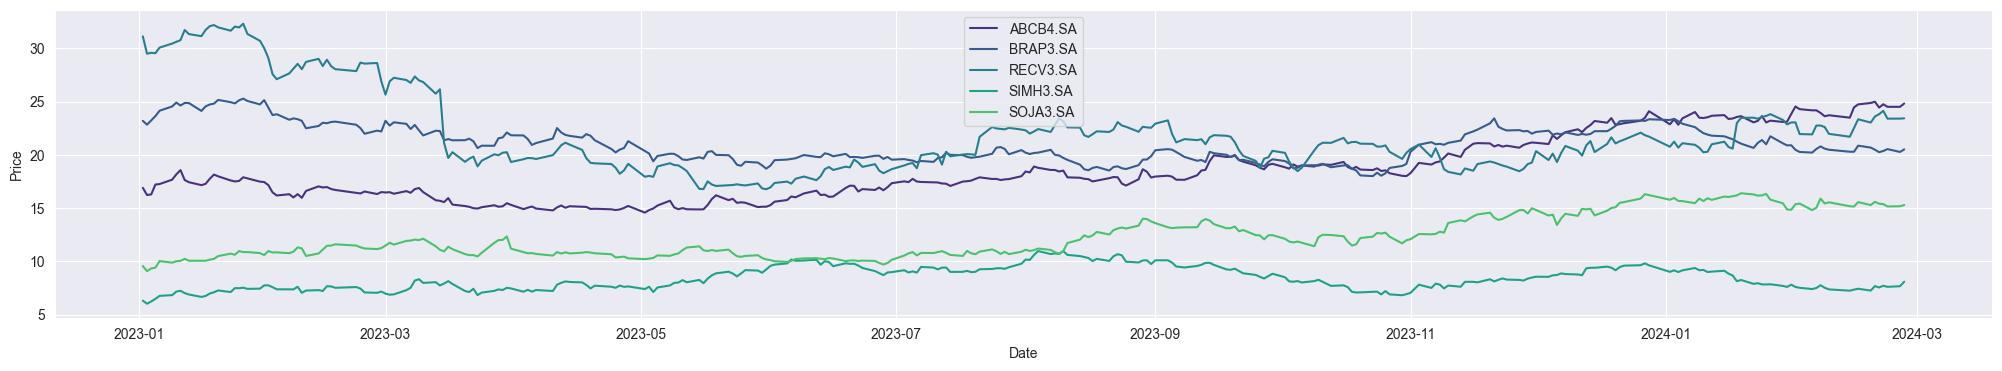

In [47]:
plt.figure(figsize=(25,4))
for column in data_adjClose.columns:
    plt.plot(data_adjClose.index, data_adjClose[column], label=column)

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [48]:
#Calculating Returns
returns = data_adjClose.pct_change()
returns

Ticker,ABCB4.SA,BRAP3.SA,RECV3.SA,SIMH3.SA,SOJA3.SA
Date,,,,,
2023-01-02,NaN,NaN,NaN,NaN,NaN
2023-01-03,-0.039806,-0.015343,-0.052230,-0.045814,-0.050000
2023-01-04,0.003361,0.017530,0.002900,0.034768,0.027864
2023-01-05,0.056951,0.017228,-0.001285,0.040000,0.008032
2023-01-06,0.002641,0.021453,0.017696,0.043077,0.065737
...,...,...,...,...,...
2024-02-21,-0.022000,-0.011225,0.009318,-0.016927,-0.011538
2024-02-22,0.012679,0.005429,0.013009,0.021192,-0.002594
2024-02-23,-0.009693,0.008836,-0.030240,-0.012970,-0.014304


In [49]:
#Annualized covariance matrix - method for determines random variables move together. Relationship between two assets prices.

b_days = len(pd.date_range(start=start_date, end=end_date, freq='B'))  # 'B' para dias úteis
cov_matrix_annual = returns.cov() * b_days

#Main diagonal = variance. variance ** 2 = volatility
cov_matrix_annual

Ticker,ABCB4.SA,BRAP3.SA,RECV3.SA,SIMH3.SA,SOJA3.SA
Ticker,,,,,
ABCB4.SA,0.095427,0.021461,0.043612,0.076150,0.026752
BRAP3.SA,0.021461,0.075888,0.032867,0.047166,0.020312
RECV3.SA,0.043612,0.032867,0.249227,0.072638,0.038490
SIMH3.SA,0.076150,0.047166,0.072638,0.258572,0.071015
SOJA3.SA,0.026752,0.020312,0.038490,0.071015,0.170617


In [50]:
#Calculating portfolio variance
weights = np.array([0.5, 0.2, 0., 0.1, 0.2])
tickers = ["SOJA3.SA", "ABCB4.SA", "SIMH3.SA", "RECV3.SA", "BRAP3.SA"]

port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.05991241026474425

In [51]:
#Calculating portfolio volatility
port_volatility = np.sqrt(port_variance)
round(port_volatility,2)

0.24

In [52]:
#Calculate the annual portfolio return
portfolio_sample_annual_return = np.sum(returns.mean() * weights) * b_days
round(portfolio_sample_annual_return,2)

0.36

In [53]:
#Show expected annual return, volatility and variance
percentual_variance = str(round(port_variance, 2)*100) + '%'
percentual_volatility = str(round(port_volatility, 2)*100) + '%'
percentual_return = str(round(portfolio_sample_annual_return, 2)*100) + '%'

print(f"Expected annual return: {percentual_return}" )
print(f"Expected annual volatility/risk: {percentual_volatility}")
print(f"Expected annual variance: {percentual_variance}")

Expected annual return: 36.0%
Expected annual volatility/risk: 24.0%
Expected annual variance: 6.0%


In [18]:
#Portfolio optimization

#Calculate the expected returns and the annualized sample covariance matrix of asset returns
#mu = expected_returns.mean_historical_return(data_adjClose)
#S = risk_models.sample_cov(data_adjClose)

#Optmimze for max sharpe ration
#ef = EfficientFrontier(mu, S)
#weights = ef.max_sharpe()
#cleaned_weights = ef.clean_weights()
#ef.portfolio_performance(verbose=True)

In [19]:
#print(cleaned_weights)